# Importing Libraries


In [ ]:
from seaborn import heatmap, boxplot
from pandas import read_csv
from matplotlib import pyplot
%matplotlib inline

# Loading Dataset - California Housing

In [ ]:
train = read_csv("./sample_data/california_housing_train.csv", encoding="utf-8")
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Let's say we want to build a regression model that predicts the value of a housing society given its features. But before that we need to perform EDA to get the best possible data that is:


*   Devoud of Nulls
*   Devoud of Outliers
*   Having the relevant features - technique called *Feature Selection*



# Checking Nulls

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


So there are no null values in any of the column. Visually checking if nulls present i.e. plotting True/False for nulls. Hence the extreme values will appeal visually and will show the presence of nulls. 

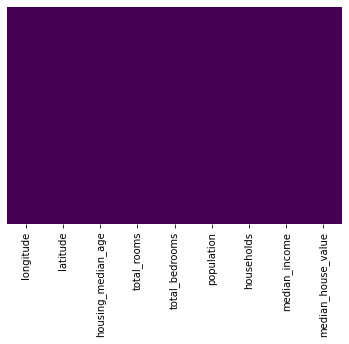

In [ ]:
heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

If there are nulls found, then either they are:

*   Removed Or
*   Imputed i.e. filled either by **mean** or **median** for *continuous* variable or **mode** for categorical variable.



# Detecting Outliers

Getting overall description i.e. count, mean, standard deviation, maximum, minimum, 25th percentile, 50th percentile(median) and 75th percentile 

In [ ]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Observe 75th percentile and maximum values in *total_rooms*, *total_bedrooms*, *polulation* and *households* have a significant difference, suggesting presence of outliers.

To get a better idea of outliers in a variable, **box plot** or *box and whisker plot* is used, since it plots all points in a line and depicts its distribution statistics:


*   Minimum
*   First Quartile - 25th percentile
*   Second Quartile or Median - 50th percentile
*   Third Quartile - 75th percentile
*   Maximum

All outliers lie outside the whiskers.




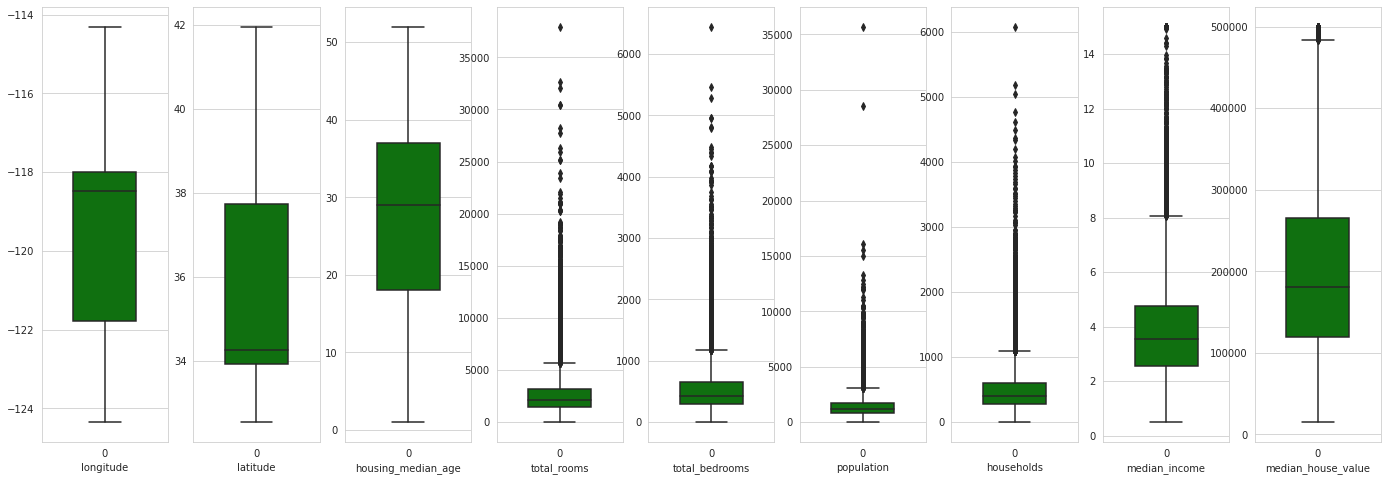

In [ ]:
columns = train.columns.values
pyplot.figure(figsize=(24,8))
for i in range(len(columns)):
  pyplot.subplot(1, len(columns),i+1)
  boxplot(data=train[columns[i]], color="green", orient="v", width=0.5).set(xlabel=columns[i])

Clearly visible that columns(or variables) *total_rooms*, *total_bedrooms*, *polulation* and *households* as observed earlier have outliers. Also *median_income* has some outliers too while *median_house_value* has few outliers.

# Removing Outliers

Now a dataset with outliers can't be fed to a model, since it will deviate its behaviour from general observaions. Hence we need to remove these outliers and it is possible that if we remove outliers of one column, subsequent outliers of other columns are removed.

Techniques to remove outliers:


1.   **3 Standard Deviation** technique
*   Standard deviation is the deviation of a data from its mean value.
*   1 standard deviation away from mean i.e. `(mean) + k*(std_dev)` where k=+1 and -1 for this case, covers 68% of the data.
*   2 standard deviations away from mean covers 95% of the data.
*   Hence data lying across 3 standard deviations away from  mean is considered as an outlier.
*   Though for small datasets sometimes data lying across 2 standard deviations away from mean is considered as an outlier.   


2.   **Z-Score** technique
*    It tells that how many standard deviations away from the mean, a data lies in the sample.
*    Calculated as `[(data) - (mean)]/(std_dev)`. Observe this is rearranged form of above equation and so the idea as depicted above holds true here as well.

3.  **Percentile** technique
*   Percentile of a data in the sample defines percentage of sample that lies below it. Eg: if percentile(x) = 0.7 or 70%, then 70% of the sample lies below x.
*   In other words, the maximum value in the sample is 1 or 100% percentile and minimum value in the sample is 0 or 0% percentile.
*   Getting values that are at 0.95 percentile in the data.


In [ ]:
train.quantile(0.95)

longitude               -117.07000
latitude                  38.96000
housing_median_age        52.00000
total_rooms             6269.05000
total_bedrooms          1283.00000
population              3297.05000
households              1172.10000
median_income              7.36447
median_house_value    495500.00000
Name: 0.95, dtype: float64



*   Though there is no such thumb rule to set a threshold to remove the values beyond a particular percentile value, but generally values that lie in percentile range [0.05,0.95] are taken. Or any data beyond 95% percentile or below 5% percentile is considered as an outlier. 



# Feature Selection

So far we have:

1.   Removed or Imputed Nulls
2.   Removed Outliers

Hence we have the data in the cleanest form. But still we are not ready to feed this to the model, since we don't know which are the variables that will make the model better in terms of:
1.  Performance i.e. time to train.
2.  Accuracy i.e. quality of the model.

This introduces us to **Feature Selection** technique i.e. to select features to meet the above objectives. The most common technique to select features is using **correlation**.

Our model in some way has to construct relationship of fed in variables to target variable. Hence to feed in the data to model we should have variables that in some way are dependent on the target variable and are independent of each other. Hence, we'll remove features that give correlation value close to 0 or we can decide a threshold for this as well. 



In [ ]:
train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


To visualize this correlation map:

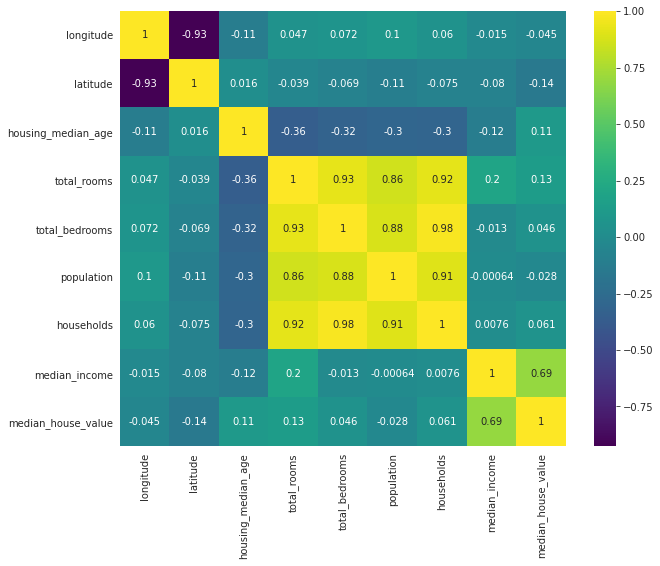

In [ ]:
pyplot.figure(figsize=(10,8))
heatmap(train.corr(), annot=True, cmap="viridis")